In [1]:
import sys
sys.path.append('../')

## Import packages

In [2]:
from sklearn.datasets import load_breast_cancer
from tabnet.estimator import TabNetClassifier
from tabnet.utils.logger import init_logger

## Init logger

In [3]:
logger_dir = 'logs'
logger_name = 'TestRegression'
level = 'INFO'

logger = init_logger(logger_dir=logger_dir, logger_name=logger_name, level=level)

## Load data

In [4]:
X, y = load_breast_cancer(return_X_y=True)

print(X.shape)
print(y.shape)

(569, 30)
(569,)


## Init estimator

In [5]:
tabnet_classifier = TabNetClassifier(
    input_dims=30, output_dims=[1], logger=logger, is_cuda=True,
    reprs_dims=4, atten_dims=4, num_steps=3, num_indep=1, num_shared=1, 
    virtual_batch_size=256, batch_size=512
)

tabnet_classifier.build(path=None)

[2021-02-20 10:21:43,586][WARNING][TabNet] Failed to load model from None


TabNetClassifier(atten_dims=4, batch_size=512, input_dims=30, is_cuda=True,
                 logger=<RootLogger root (INFO)>, num_indep=1, num_shared=1,
                 output_dims=[1], reprs_dims=4, virtual_batch_size=256)

## Setup training parameters

In [6]:
from torch.optim import Adam
from torch.optim import lr_scheduler

training_params = {
    'batch_size': 512,
    'max_epochs': 100,
    'optimizer': Adam,
    'optimizer_params': {'lr': 0.2},
    'schedulers': [lr_scheduler.ExponentialLR],
    'scheduler_params': {'gamma': 0.99}
}

## Start training

In [7]:
tabnet_classifier.pretrain(X, **training_params)

[2021-02-20 10:21:43,627][INFO][TabNet] Convert to pretrain model.
[2021-02-20 10:21:43,628][INFO][TabNet] start training.
[2021-02-20 10:21:43,629][INFO][TabNet] ******************** epoch : 0 ********************
[2021-02-20 10:21:48,609][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:21:48,610][INFO][TabNet] total_loss : 2702.00244140625
[2021-02-20 10:21:48,611][INFO][TabNet] task_loss : 2702.001220703125
[2021-02-20 10:21:48,611][INFO][TabNet] mask_loss : -1.254914402961731
[2021-02-20 10:21:48,611][INFO][TabNet] time_cost : 0.919001
[2021-02-20 10:21:48,612][INFO][TabNet] ******************** epoch : 1 ********************
[2021-02-20 10:21:52,710][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:21:52,711][INFO][TabNet] total_loss : 615.77294921875
[2021-02-20 10:21:52,712][INFO][TabNet] task_loss : 615.77197265625
[2021-02-20 10:21:52,713][INFO][TabNet] mask_loss : -0.9804258346557617
[2021-02-20 10:21:52,713][

[2021-02-20 10:22:58,583][INFO][TabNet] mask_loss : -0.39731258153915405
[2021-02-20 10:22:58,584][INFO][TabNet] time_cost : 0.042913
[2021-02-20 10:22:58,585][INFO][TabNet] ******************** epoch : 18 ********************
[2021-02-20 10:23:02,693][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:23:02,694][INFO][TabNet] total_loss : 15.108489990234375
[2021-02-20 10:23:02,694][INFO][TabNet] task_loss : 15.108062744140625
[2021-02-20 10:23:02,695][INFO][TabNet] mask_loss : -0.4276200234889984
[2021-02-20 10:23:02,696][INFO][TabNet] time_cost : 0.042861
[2021-02-20 10:23:02,697][INFO][TabNet] ******************** epoch : 19 ********************
[2021-02-20 10:23:06,854][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:23:06,855][INFO][TabNet] total_loss : 24.708843231201172
[2021-02-20 10:23:06,856][INFO][TabNet] task_loss : 24.708478927612305
[2021-02-20 10:23:06,856][INFO][TabNet] mask_loss : -0.36356958746910095
[2

[2021-02-20 10:24:12,907][INFO][TabNet] task_loss : 6.714094638824463
[2021-02-20 10:24:12,908][INFO][TabNet] mask_loss : -0.28884875774383545
[2021-02-20 10:24:12,908][INFO][TabNet] time_cost : 0.050865
[2021-02-20 10:24:12,909][INFO][TabNet] ******************** epoch : 36 ********************
[2021-02-20 10:24:17,014][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:24:17,015][INFO][TabNet] total_loss : 6.757750988006592
[2021-02-20 10:24:17,015][INFO][TabNet] task_loss : 6.7574543952941895
[2021-02-20 10:24:17,016][INFO][TabNet] mask_loss : -0.2963985204696655
[2021-02-20 10:24:17,017][INFO][TabNet] time_cost : 0.041887
[2021-02-20 10:24:17,018][INFO][TabNet] ******************** epoch : 37 ********************
[2021-02-20 10:24:21,140][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:24:21,141][INFO][TabNet] total_loss : 6.6143693923950195
[2021-02-20 10:24:21,141][INFO][TabNet] task_loss : 6.614062309265137
[2021-0

[2021-02-20 10:25:26,725][INFO][TabNet] total_loss : 4.753039836883545
[2021-02-20 10:25:26,726][INFO][TabNet] task_loss : 4.752732276916504
[2021-02-20 10:25:26,726][INFO][TabNet] mask_loss : -0.30748429894447327
[2021-02-20 10:25:26,727][INFO][TabNet] time_cost : 0.04887
[2021-02-20 10:25:26,727][INFO][TabNet] ******************** epoch : 54 ********************
[2021-02-20 10:25:30,812][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:25:30,813][INFO][TabNet] total_loss : 4.4697136878967285
[2021-02-20 10:25:30,814][INFO][TabNet] task_loss : 4.469386100769043
[2021-02-20 10:25:30,815][INFO][TabNet] mask_loss : -0.3277146518230438
[2021-02-20 10:25:30,816][INFO][TabNet] time_cost : 0.043871
[2021-02-20 10:25:30,817][INFO][TabNet] ******************** epoch : 55 ********************
[2021-02-20 10:25:34,888][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:25:34,889][INFO][TabNet] total_loss : 4.586021423339844
[2021-02

[2021-02-20 10:26:40,315][INFO][TabNet] total_loss : 4.193792819976807
[2021-02-20 10:26:40,316][INFO][TabNet] task_loss : 4.193470001220703
[2021-02-20 10:26:40,317][INFO][TabNet] mask_loss : -0.32301682233810425
[2021-02-20 10:26:40,317][INFO][TabNet] time_cost : 0.042857
[2021-02-20 10:26:40,317][INFO][TabNet] ******************** epoch : 72 ********************
[2021-02-20 10:26:44,394][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:26:44,396][INFO][TabNet] total_loss : 4.460747241973877
[2021-02-20 10:26:44,397][INFO][TabNet] task_loss : 4.460411071777344
[2021-02-20 10:26:44,397][INFO][TabNet] mask_loss : -0.3361836373806
[2021-02-20 10:26:44,398][INFO][TabNet] time_cost : 0.043912
[2021-02-20 10:26:44,399][INFO][TabNet] ******************** epoch : 73 ********************
[2021-02-20 10:26:48,491][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:26:48,491][INFO][TabNet] total_loss : 4.1211371421813965
[2021-02-2

[2021-02-20 10:27:53,354][INFO][TabNet] total_loss : 4.0711774826049805
[2021-02-20 10:27:53,355][INFO][TabNet] task_loss : 4.070847988128662
[2021-02-20 10:27:53,356][INFO][TabNet] mask_loss : -0.3296639323234558
[2021-02-20 10:27:53,356][INFO][TabNet] time_cost : 0.043876
[2021-02-20 10:27:53,357][INFO][TabNet] ******************** epoch : 90 ********************
[2021-02-20 10:27:57,416][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:27:57,417][INFO][TabNet] total_loss : 3.9876441955566406
[2021-02-20 10:27:57,418][INFO][TabNet] task_loss : 3.9873414039611816
[2021-02-20 10:27:57,419][INFO][TabNet] mask_loss : -0.30267974734306335
[2021-02-20 10:27:57,419][INFO][TabNet] time_cost : 0.049136
[2021-02-20 10:27:57,420][INFO][TabNet] ******************** epoch : 91 ********************
[2021-02-20 10:28:01,486][INFO][TabNet] -------------------- train info --------------------
[2021-02-20 10:28:01,487][INFO][TabNet] total_loss : 3.832104444503784
[2021

TabNetClassifier(atten_dims=4, batch_size=512, input_dims=30, is_cuda=True,
                 logger=<RootLogger root (INFO)>, num_indep=1, num_shared=1,
                 output_dims=[1], reprs_dims=4, virtual_batch_size=256)

## Extract feature representation

In [9]:
reprs = tabnet_classifier.extract(X)

## K-Means with Elbow Method

In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

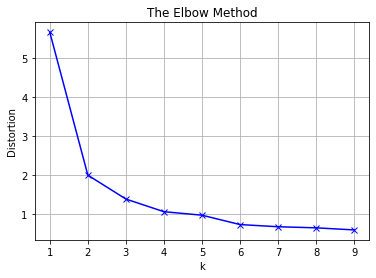

In [13]:
distortions = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k).fit(reprs)
    distortions.append(sum(np.min(cdist(reprs, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.grid()
plt.show()

***K = 2 is the best !***

## Visaulization of the feature representaton

In [74]:
km = KMeans(n_clusters=2).fit(reprs)
clusters = km.predict(reprs)

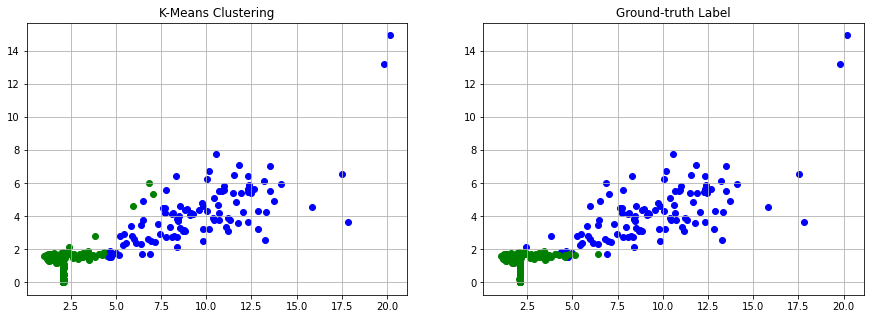

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(reprs[np.where(clusters==0)[0], 0], reprs[np.where(clusters==0)[0], 1], color='g')
ax[0].scatter(reprs[np.where(clusters==1)[0], 0], reprs[np.where(clusters==1)[0], 1], color='b')
ax[0].set_title('K-Means Clustering')
ax[0].grid()

ax[1].scatter(reprs[np.where(y==0)[0], 0], reprs[np.where(y==0)[0], 1], color='b')
ax[1].scatter(reprs[np.where(y==1)[0], 0], reprs[np.where(y==1)[0], 1], color='g')
ax[1].set_title('Ground-truth Label')
ax[1].grid()

## Explaination

In [82]:
from tabnet.core import ModelConverter

tabnet_classifier._model = ModelConverter.to_inference(
    tabnet_classifier._model, tabnet_classifier._model_configs, 'cuda'
)

In [83]:
importance, masks = tabnet_classifier.explain(X)

In [84]:
feature_names = [
    'mean radius',
     'mean texture',
     'mean perimeter',
     'mean area',
     'mean smoothness',
     'mean compactness',
     'mean concavity',
     'mean concave points',
     'mean symmetry',
     'mean fractal dimension',
     'radius error',
     'texture error',
     'perimeter error',
     'area error',
     'smoothness error',
     'compactness error',
     'concavity error',
     'concave points error',
     'symmetry error',
     'fractal dimension error',
     'worst radius',
     'worst texture',
     'worst perimeter',
     'worst area',
     'worst smoothness',
     'worst compactness',
     'worst concavity',
     'worst concave points',
     'worst symmetry',
     'worst fractal dimension'
]

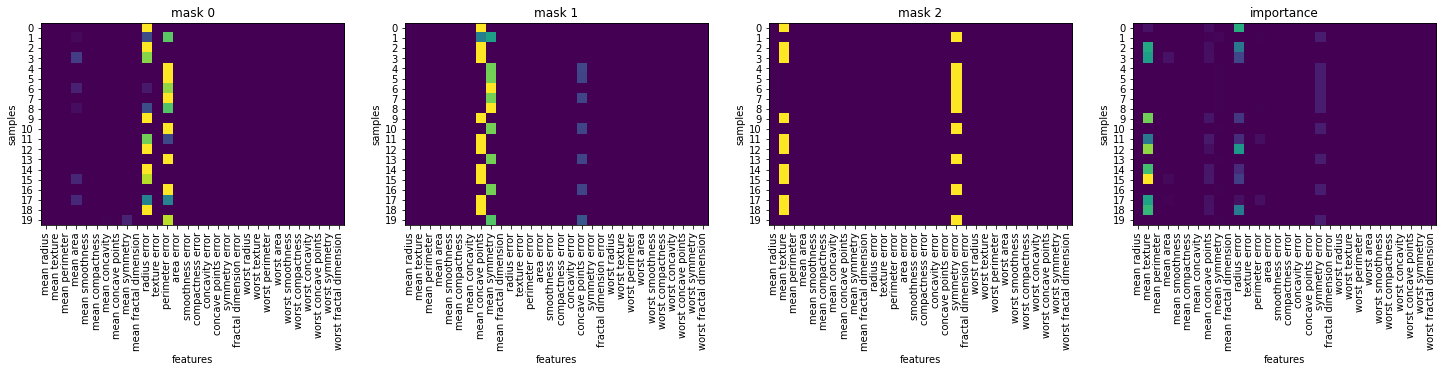

In [87]:
fig, axs = plt.subplots(1, 4, figsize=(25,25))

for i in range(3):
    axs[i].imshow(masks[i].cpu().numpy()[:20])
    axs[i].set_xlabel('features')
    axs[i].set_ylabel('samples')
    axs[i].set_title(f"mask {i}")
    axs[i].set_yticks(range(20))
    axs[i].set_xticks(range(30))
    axs[i].set_xticklabels(feature_names, rotation=90)

axs[3].imshow(importance.cpu().numpy()[:20, :])
axs[3].set_xlabel('features')
axs[3].set_ylabel('samples')
axs[3].set_title('importance')
axs[3].set_yticks(range(20))
axs[3].set_xticks(range(30))
axs[3].set_xticklabels(feature_names, rotation=90)
plt.show()